PROJECT NAME: Magnitude of Surgical Site Infections (SSIs) and Associated Factors among Post-Operative Patients at Myungsung Christian Medical Centre








 By Husna Fazal Ahmed

In [83]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Define a function to create and train a model
def train_and_evaluate_model(optimizer, model_name, epochs=50, batch_size=32):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    # Save the model
    save_path = f'saved_models/{model_name}.h5'
    model.save(save_path)
    print(f'Model saved to {save_path}')

    # Optionally, return the model
    return model

# Ensure the directory for saved models exists
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')
    print("Directory 'saved_models' created")

# Train and save the simple model
simple_model = train_and_evaluate_model(SGD(learning_rate=0.01), 'simple_nn_model')

# Train and save the optimized model with a different optimizer for demonstration
optimized_model = train_and_evaluate_model(Adam(learning_rate=0.001), 'optimized_nn_model')

# Example of loading the models
loaded_simple_model = load_model('saved_models/simple_nn_model.h5')
loaded_optimized_model = load_model('saved_models/optimized_nn_model.h5')

print("Models loaded successfully")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to saved_models/simple_nn_model.h5
Model saved to saved_models/optimized_nn_model.h5
Models loaded successfully


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [ ]:
# Load the dataset
ssi_data = pd.read_csv('/content/data/SSI Data.csv')
# Identify columns that are of object type (string columns)
object_columns = ssi_data.select_dtypes(include=['object']).columns


In [ ]:
# One-hot encode the object columns
for col in object_columns:
    encoder = OneHotEncoder(sparse_output=False)  # Updated parameter based on warning
    encoded_data = encoder.fit_transform(ssi_data[[col]])
    # Create a DataFrame from the encoded data
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    # Drop the original column and concatenate the encoded DataFrame
    ssi_data = ssi_data.drop(col, axis=1).reset_index(drop=True)
    ssi_data = pd.concat([ssi_data, encoded_df], axis=1)

In [ ]:

# Replace spaces or any other non-numeric placeholder with NaN and then fill with 0
ssi_data = ssi_data.replace(' ', np.nan).fillna(0)

# Assuming 'SSI' is the target column
X = ssi_data.drop('SSI', axis=1)
y = ssi_data['SSI']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define the model
model = Sequential([
    # Input layer & first hidden layer
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # You can add more hidden layers if needed
    # Output layer - using sigmoid activation function for binary classification
    Dense(1, activation='sigmoid')
])


In [ ]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Compile the model
model.compile(
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [84]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
7/7 [==============================] - 0s 23ms/step - loss: 186.2167 - accuracy: 0.8930 - val_loss: 501.8717 - val_accuracy: 0.9444
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 220.4205 - accuracy: 0.9349 - val_loss: 385.3132 - val_accuracy: 0.9444
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 299.8078 - accuracy: 0.8651 - val_loss: 722.3235 - val_accuracy: 0.9444
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 495.5132 - accuracy: 0.9581 - val_loss: 388.8111 - val_accuracy: 0.9444
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 231.1044 - accuracy: 0.8791 - val_loss: 608.1608 - val_accuracy: 0.9444
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 370.4653 - accuracy: 0.9581 - val_loss: 185.8585 - val_accuracy: 0.9444
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 259.6904 - accuracy: 0.8884 - val_loss: 438.9406 - val_accuracy: 0.9444
Epoch

ye

In [ ]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy}")


3/3 [==============================] - 0s 3ms/step - loss: 56.3195 - accuracy: 0.9853
Test Accuracy: 0.9852941036224365


In [ ]:


# Make predictions
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int) # Convert probabilities to binary predictions

# Generate confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))



3/3 [==============================] - 0s 2ms/step
Confusion Matrix:
[[67  0]
 [ 1  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       0.00      0.00      0.00         1

    accuracy                           0.99        68
   macro avg       0.49      0.50      0.50        68
weighted avg       0.97      0.99      0.98        68



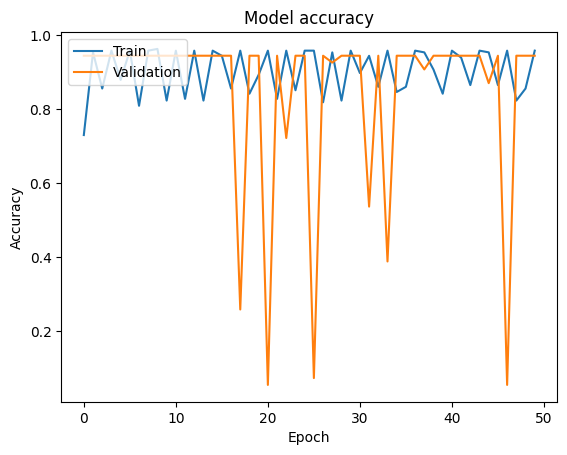

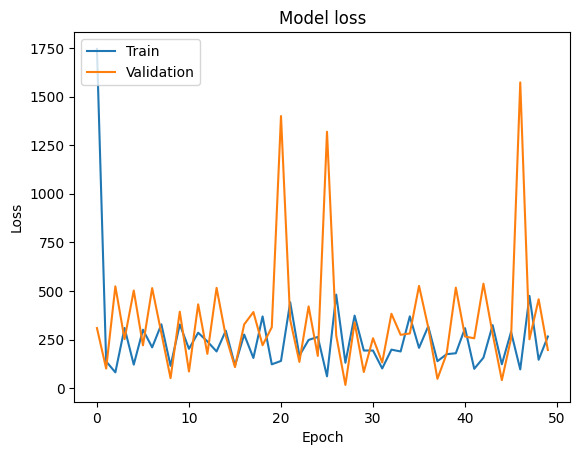

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Implementing the Models

1: Simple Neural Network

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming your preprocessing steps are already done and you have X_train, X_test, y_train, y_test ready

# Define the model
model = Sequential([
    # Input layer & first hidden layer
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # You can add more hidden layers if needed
    # Output layer - using sigmoid activation function for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model with default settings
# By default, Keras uses the RMSprop optimizer and calculates loss in a way that's appropriate for the provided model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy}")

simple_model_path = 'saved_models/simple_nn_model.h5'
model.save(simple_model_path)


Epoch 1/10
7/7 [==============================] - 0s 24ms/step - loss: 1010.9102 - accuracy: 0.9302 - val_loss: 1144.3966 - val_accuracy: 0.9444
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 827.1066 - accuracy: 0.8512 - val_loss: 719.2280 - val_accuracy: 0.9444
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 400.4547 - accuracy: 0.9302 - val_loss: 591.0550 - val_accuracy: 0.9444
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 336.8504 - accuracy: 0.9395 - val_loss: 233.5620 - val_accuracy: 0.9444
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 187.7699 - accuracy: 0.9163 - val_loss: 312.8648 - val_accuracy: 0.9444
Epoch 6/10
7/7 [==============================] - 0s 4ms/step - loss: 244.7330 - accuracy: 0.9209 - val_loss: 252.1864 - val_accuracy: 0.9444
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 313.4678 - accuracy: 0.8977 - val_loss: 436.6015 - val_accuracy: 0.9444
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model 2: Optimized Neural Network

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# Assuming your preprocessing steps are already done and you have X_train, X_test, y_train, y_test ready

def train_and_evaluate_model(optimizer):
    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    return test_accuracy

# Optimizers to test
optimizers = [SGD(learning_rate=0.01), Adam(learning_rate=0.001), RMSprop(learning_rate=0.001)]

# Train and evaluate the model with each optimizer
for optimizer in optimizers:
    optimizer_name = optimizer.__class__.__name__
    accuracy = train_and_evaluate_model(optimizer)
    print(f"Test Accuracy with {optimizer_name}: {accuracy}")

optimized_model_path = 'saved_models/optimized_nn_model.h5'
model.save(optimized_model_path)

Test Accuracy with SGD: 0.9852941036224365
Test Accuracy with Adam: 0.9411764740943909
Test Accuracy with RMSprop: 0.9852941036224365


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
